In [20]:
# ETAPA 1
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Carregando o dataset

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [21]:
# ETAPA 2
print(f'Tamanho do conjunto de treino:{x_train.shape}')
print(f'Tamanho do conjunto de teste:{x_test.shape}')
print(f'Formato de uma imagem:{x_train[0].shape}')

Tamanho do conjunto de treino:(60000, 28, 28)
Tamanho do conjunto de teste:(10000, 28, 28)
Formato de uma imagem:(28, 28)


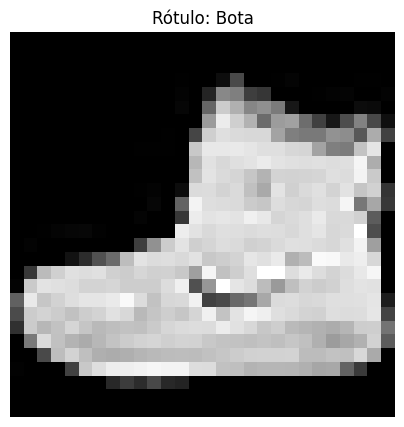

In [22]:
# exibindo uma imagem de exemplo
classes_nomes=['Camiseta/top', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.figure(figsize=(5,5))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Rótulo: {classes_nomes[y_train[0]]}")
plt.axis('off')
plt.show()

In [23]:
# Normalização os dados (escala de 0-255 -> 0-1)
x_train=x_train / 255.0
x_test=x_test / 255.0


In [24]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
historico = modelo.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7568 - loss: 0.6949 - val_accuracy: 0.8518 - val_loss: 0.3986
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8471 - loss: 0.4159 - val_accuracy: 0.8605 - val_loss: 0.3842
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8617 - loss: 0.3780 - val_accuracy: 0.8698 - val_loss: 0.3498
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8707 - loss: 0.3498 - val_accuracy: 0.8768 - val_loss: 0.3429
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8770 - loss: 0.3339 - val_accuracy: 0.8657 - val_loss: 0.3571
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8821 - loss: 0.3220 - val_accuracy: 0.8812 - val_loss: 0.3275
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8868 - loss: 0.3069 - val_accuracy: 0.8775 - val_loss: 0.3295
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8896 - loss: 0.2984 - 

In [27]:
test_loss, test_acc = modelo.evaluate(x_test,y_test)
print(f"Acuracia no conjunto de teste: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3486
Acuracia no conjunto de teste: 0.88


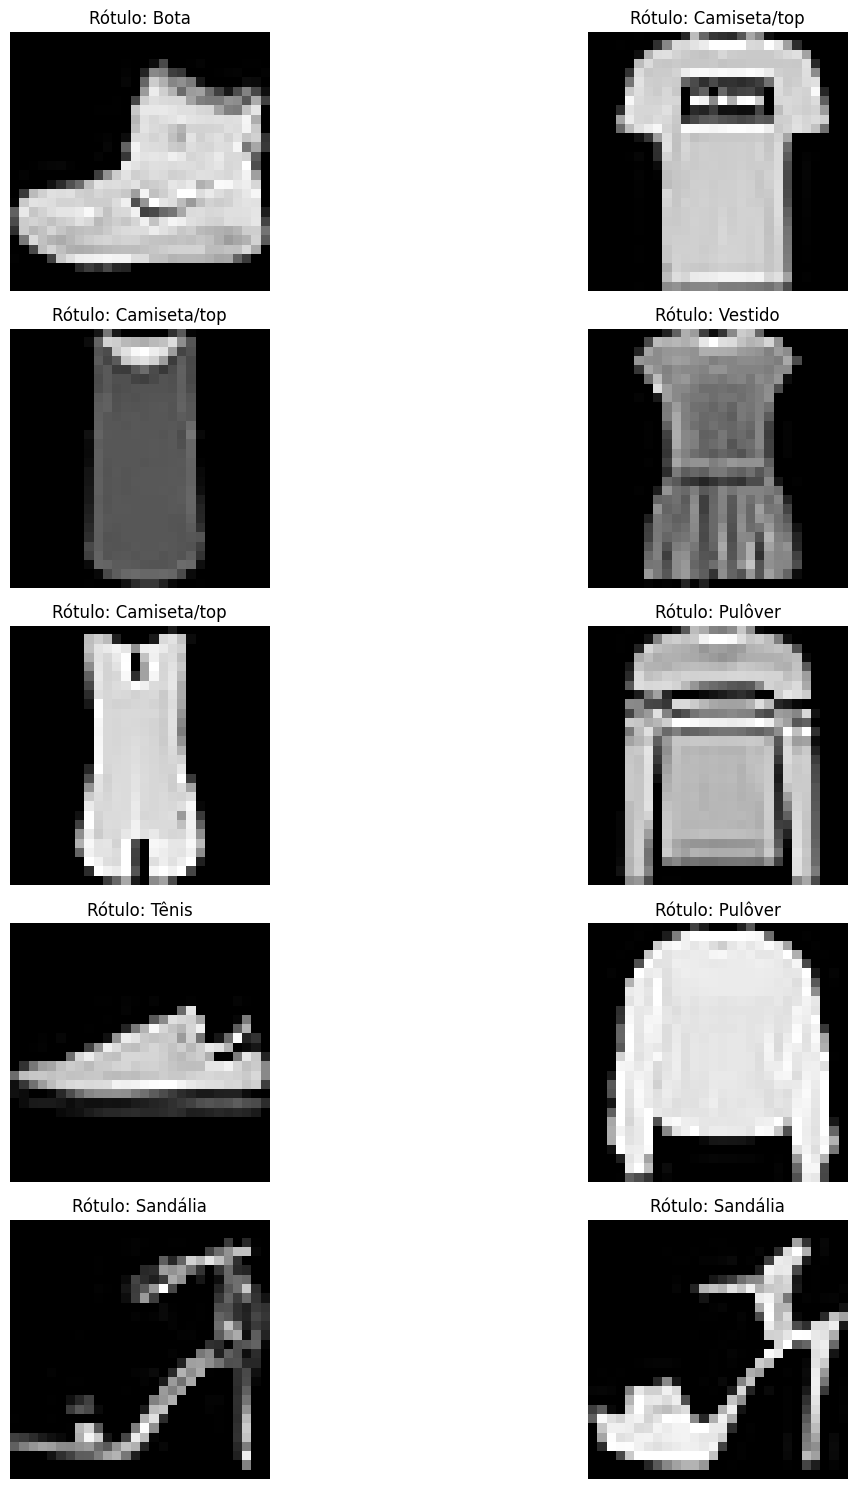

In [28]:
classes_nomes = ['Camiseta/top', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# Número de imagens que você quer mostrar
num_imagens = 10

plt.figure(figsize=(15, 15))
for i in range(num_imagens):
    plt.subplot(5, 2, i+1)  # 5 linhas, 2 colunas
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Rótulo: {classes_nomes[y_train[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

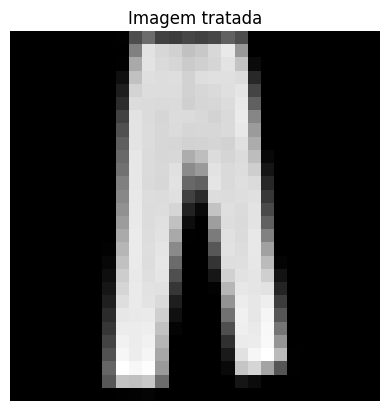

In [29]:
# from tensorflow.keras.models import image
from PIL import Image
import numpy as np

# Caminho da imagem PNG externa
caminho = './imagens/calca.jpg'

# 1. Abrir a imagem com PIL
img = Image.open(caminho).convert('L')  # Converter para escala de cinza
# 2. Redimensionar a imagem para 28x28 pixels
img = img.resize((28, 28))  
# 3. Converter a imagem para um array NumPy e normalizar os valores
img_array = np.array(img) / 255.0
# 4. Inverter cores se fundo for escuro e a peça for clara (opcional)
img_array = 1 - img_array
# 5. Adicionar uma dimensão extra para representar o batch size = 1
img_array = img_array.reshape(1, 28, 28)
# img array = 1 -img array

# Vizualizar imagem tratada
import matplotlib.pyplot as plt
plt.imshow(img_array[0], cmap='gray')
plt.title("Imagem tratada")
plt.axis('off')
plt.show()

In [30]:
predicao = modelo.predict(img_array)
indice_classe = np.argmax(predicao)

print(f"Classe prevista: {classes_nomes[indice_classe]}")
print(f"Confiancança: {predicao[0][indice_classe]*100:.2f}%")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Classe prevista: Calça
Confiancança: 99.97%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


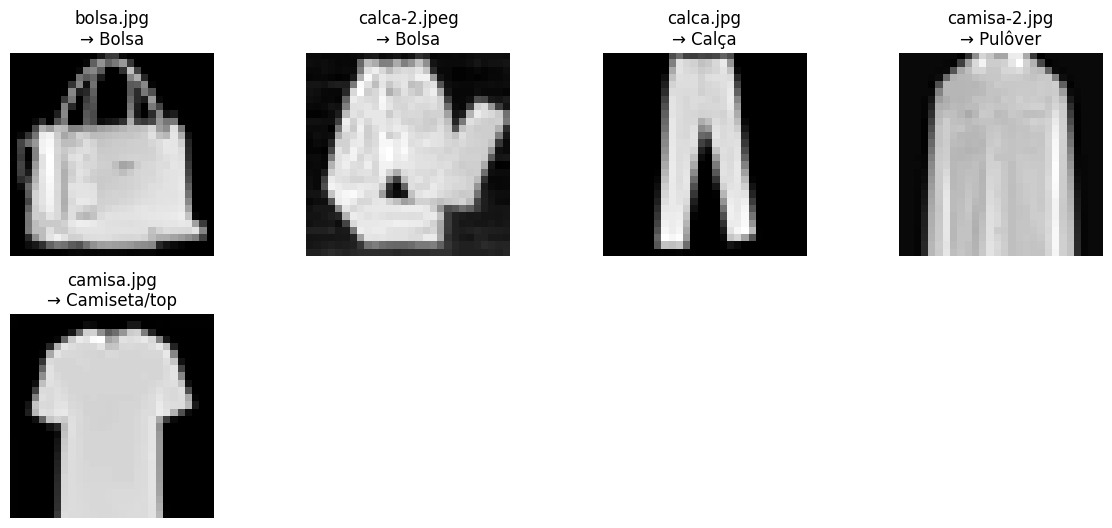

In [31]:
import os
from PIL import Image

# Pasta com imagens que você quer classificar
caminho_pasta = './imagens'

# Função para carregar e preparar imagens
def carregar_imagem(caminho):
    img = Image.open(caminho).convert('L')  # Converte para tons de cinza
    img = img.resize((28, 28))  # Redimensiona para o tamanho do dataset original
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normaliza
    img_array = 1 - img_array
    return img_array

# Lista de classes do Fashion MNIST
classes_nomes = ['Camiseta/top', 'Calça', 'Pulôver', 'Vestido', 'Casaco',
                 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# Carregar imagens da pasta e fazer predições
plt.figure(figsize=(12, 8))

for i, nome_arquivo in enumerate(os.listdir(caminho_pasta)):
    caminho_imagem = os.path.join(caminho_pasta, nome_arquivo)
    imagem = carregar_imagem(caminho_imagem)
    imagem_reshape = imagem.reshape(1, 28, 28)  # Adiciona dimensão de batch
    
    predicao = modelo.predict(imagem_reshape)
    classe_prevista = classes_nomes[np.argmax(predicao)]

    # Plotar imagem com nome e classe prevista
    plt.subplot(3, 4, i + 1)
    plt.imshow(imagem, cmap='gray')
    plt.title(f"{nome_arquivo}\n→ {classe_prevista}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [32]:
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Erro ao abrir a câmera")
    exit()
